## ISOMAP

#### step 1 : neighborhood graph 계산

In [1]:
class Graph(object):
    def __init__(self):
        self.nodes = set()
        self.edges = {}
        self.distances = {}
    def add_node(self, value):
        self.nodes.add(value)
    def add_edge(self, from_node, to_node, distance):
        self._add_edge(from_node, to_node, distance)
        self._add_edge(to_node, from_node, distance)
    def _add_edge(self, from_node, to_node, distance):
        self.edges.setdefault(from_node, [])
        self.edges[from_node].append(to_node)
        self.distances[(from_node, to_node)] = distance


#### step 2 : 포인트들 간의 최단 거리 계산

In [2]:
def dijkstra(graph, initial_node):
    visited_dist = {initial_node: 0}
    nodes = set(graph.nodes)
    while nodes:
        connected_node = None
        for node in nodes:
            if node in visited_dist:
                if connected_node is None:
                    connected_node = node
                elif visited_dist[node] < visited_dist[connected_node]:
                    connected_node = node
        if connected_node is None:
            break
        nodes.remove(connected_node)
        cur_wt = visited_dist[connected_node]
        for edge in graph.edges[connected_node]:
            wt = cur_wt + graph.distances[(connected_node, edge)]
            if edge not in visited_dist or wt < visited_dist[edge]:
                visited_dist[edge] = wt
    return visited_dist

#### step 3 : row dimension embedding

In [3]:
from sklearn.neighbors import NearestNeighbors, kneighbors_graph
from sklearn.decomposition import KernelPCA
from dijkstra import Graph, dijkstra
import numpy as np
import pickle

def isomap(input, n_neighbors, n_components, n_jobs):
    distance_matrix = pickle.load(open('./isomap_distance_matrix.p', 'rb'))
    kernel_pca_ = KernelPCA(n_components=n_components,
                                 kernel="precomputed",
                                 eigen_solver='arpack', max_iter=None,
                                 n_jobs=n_jobs)
    Z = distance_matrix ** 2
    Z *= -0.5
    embedding = kernel_pca_.fit_transform(Z)
    return(embedding)

#### Isomap library

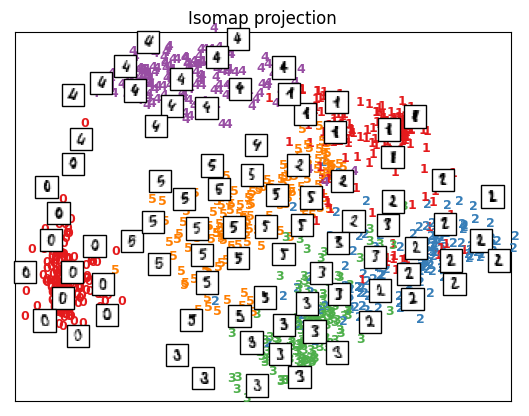

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

digits = datasets.load_digits(n_class=6)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30


def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)


# Isomap projection of the digits dataset
X_iso = manifold.Isomap(n_neighbors=n_neighbors, n_components=2).fit_transform(X)
plot_embedding(X_iso, "Isomap projection")

###### reference
###### https://woosikyang.github.io/first-post.html
###### https://gyubin.github.io/ml/2018/10/26/non-linear-embedding